In [16]:
import pandas as pd
import plotly.graph_objects as go
from prophet import Prophet
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [8]:
df = pd.read_csv('../data/dataprocessed/AAPL_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df_prophet = df[['Date', 'close']].rename(columns={'Date': 'ds', 'close': 'y'})

df_prophet.head()

,ds,y
0,NaT,AAPL
1,2024-10-16,230.706298828125
2,2024-10-17,231.07456970214844
3,2024-10-18,233.911376953125
4,2024-10-21,235.384521484375


In [9]:
df_prophet = df_prophet.drop(df_prophet[df_prophet['y']== 'AAPL'].index)
df_prophet.head()

,ds,y
1,2024-10-16,230.706298828125
2,2024-10-17,231.07456970214844
3,2024-10-18,233.911376953125
4,2024-10-21,235.384521484375
5,2024-10-22,234.76739501953125


In [11]:
tamanho = len(df_prophet)
train_size = int(tamanho * 0.75)
train, test = df_prophet[:train_size], df_prophet[train_size:]

print(f'Tamanho do conjunto de treino: {len(train)}')
print(f'Tamanho do conjunto de teste: {len(test)}')
print(f'Tamanho total: {tamanho}')

Tamanho do conjunto de treino: 188
Tamanho do conjunto de teste: 63
Tamanho total: 251


In [12]:
model = Prophet()
model.fit(train)


10:20:07 - cmdstanpy - INFO - Chain [1] start processing
10:20:08 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future = test[['ds']].copy()
forecast = model.predict(future)

In [22]:
mae = np.mean(np.abs(np.array(forecast['yhat'].astype(float)) - np.array(test['y'].astype(float))))
print(f'Mean Absolute Error (MAE): {mae}')
rmse = np.sqrt(np.mean((np.array(forecast['yhat'].astype(float)) - np.array(test['y'].astype(float)))**2))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 27.729403764866685
Root Mean Squared Error (RMSE): 31.445340245631296


In [19]:
mae = mean_absolute_error(test['y'], forecast['yhat'])
print(f'Mean Absolute Error (MAE): {mae}')

rmse = np.sqrt(mean_squared_error(test['y'], forecast['yhat']))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 27.729403764866685
Root Mean Squared Error (RMSE): 31.445340245631296


In [23]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train['ds'], y=train['y'], name='Train'))
fig.add_trace(go.Scatter(x=test['ds'], y=test['y'], name='Test'))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='Forecast'))
fig.update_layout(title='Prophet Model Forecast vs Actuals',
                  xaxis_title='Date',
                  yaxis_title='Close Price')
fig.show()

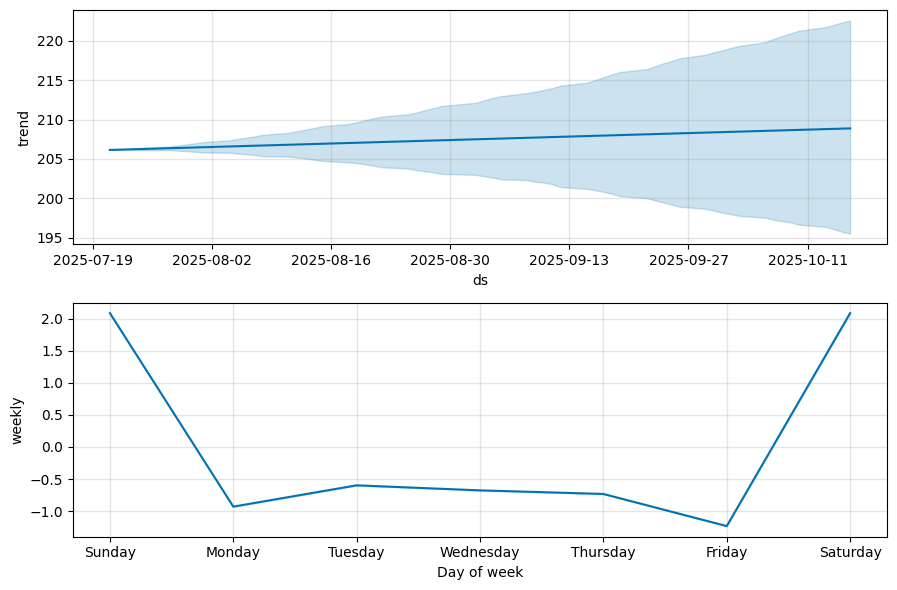

In [25]:
fig2 = model.plot_components(forecast)

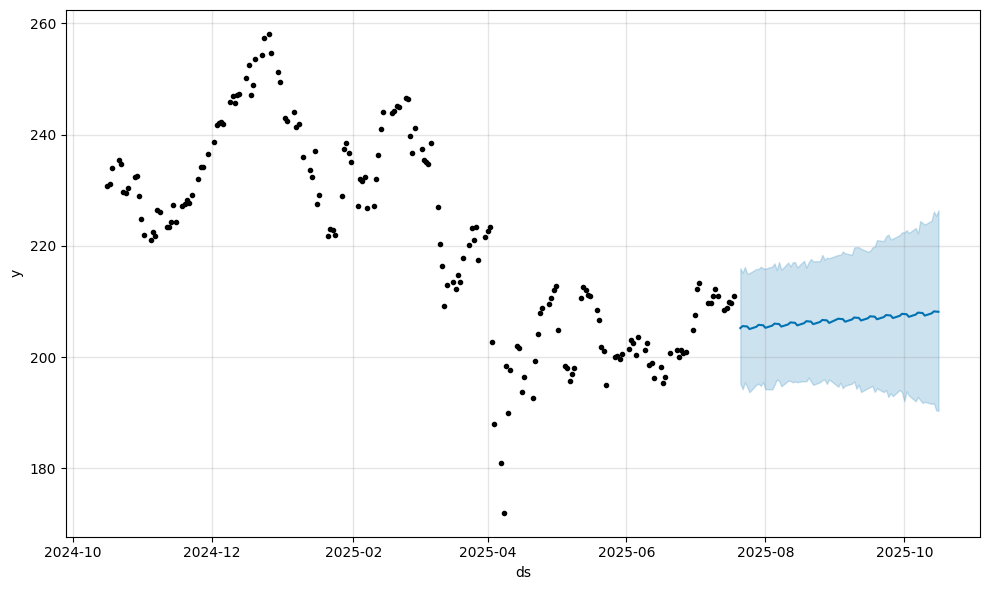

In [26]:
fig = model.plot(forecast)